## Twitter Data Wrangling

### Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#Data_Gathering">Data Gathering</a></li>
<li><a href="#Data_Assessment">Data Assessment</a></li>
<li><a href="#Data_Cleaning">Data Cleaning</a></li>
<li><a href="#Data_Tidy_Store">Data Storage</a></li>
<li><a href="#Data_Analysis">Data Analysis</a></li>
<li><a href="#References">References</a></li>
</ul>


<a id='introduction'></a>
### Introduction

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
#Preventing Pandas from collapsing columns

pd.set_option('display.max_rows', None, 'display.max_columns', None)

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

<a id='Data_Gathering'></a>

### Data Gathering

There are 3 different data sets with different file types. Each one will be read separately.

image-predictions.tsv and twitter-archive-enhanced.csv will be read similarly with pandas *read_csv* function. The variation is in the separator parameter which will indicate the that the former is a tab separated not comma separated.

tweet-json.json was originally a txt file but the content is a json. The txt file was saved as a json instead by changing the file extension from txt to json. The json would be read to produce a dataframe.

In [3]:
#read csv data

archive_data = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#read tsv file

predictions_data = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
#read json/txt file

tweet_data = pd.read_json('tweet-json.json', lines=True)

<a id='Data_Assessment'></a>

### Data Assessment

Each of the three datasets will be assessed separately for data quality issues.

#### Assessing *archive_data*

In [6]:
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


There are many NaN values in some columns. Checking for null values would show if this is recurring across the entire data.

In [7]:
#check for recurrence of null values across columns

archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The *retweeted_status_id* column contains the id of retweets which explains why it has lesser non-null values. But, retweets are technically duplicate tweets and row items that are not NaN in this column should be dropped.

The columns *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id* and *retweeted_status_timestamp* have row items that are significantly smaller than the total number of rows. There are mostly NaN values in these columns than actual values. These columns should be dropped.

In [8]:
archive_data.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

The _timestamp_ column is in object datatype but it should be in the datetime datatype and the *tweet_id* column should be a string since it is not used to mathematical purposes but to act as a unique identifier of each row item.

In [9]:
#check for duuplicated tweet_id

archive_data.tweet_id.duplicated().sum()

0

Since the _tweet_id_ column is to act as a primary key, there should be no duplicate values in the column. The value returned is zero indicating that all values are unique.

In [10]:
#check for null values in numeric columns 1

archive_data.rating_denominator.isnull().sum()

0

In [11]:
#check for null values in numeric columns 2

archive_data.rating_numerator.isnull().sum()

0

#### Assessing *predictions_data*

In [12]:
predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The *tweet_id* column should be a string since it is not used to mathematical purposes but as a unique identifier of each row item.

The values in *p1_dog*, *p2_dog* and *p3_dog* have inconsistent casing; some are lower case and others are title case words. The values have underscore instead of a space to separate words.

The values in *p1_conf*, *p2_conf* and *p3_conf* indicate the degree of confidence in the prediction but they are expressed in decimal which is not easy to relate with.

In [13]:
predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The *predictions_data* has no missing values in all columns. All columns have the same number of values; __2075__

The column names are not easy to understand as they not written in clear words but abbreviations

In [14]:
predictions_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The *img_num* column has the same value as its minimum, lower quartile, median and upper quartile value. The mean is approximately that value if rounded down but the maximum value is significantly higher.

In [15]:
#check img_num column for value distribution

predictions_data.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

The *img_num* column has a significantly higher number of rows items with __1__. The column does not have any significant use and should be dropped.

In [16]:
#check for duplicate values

predictions_data.tweet_id.duplicated().sum()

0

Since the _tweet_id_ column is to act as a primary key, there should be no duplicate values in the column. The value returned is zero indicating that all values are unique.

In [17]:
predictions_data.jpg_url.duplicated().sum()

66

Duplicated pictures would mean it is the same dog but a different tweet. These duplicates shuld be dropped

#### Assessing *tweet_data*

In [18]:
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


The _id_ column does not bear the same name; *tweet_id*, like the other tables that it will be merged with later. This should be changed. The columns _id_ and *id_str* look very similar and have some rows with exactly the same values. It appears there are a significant number of NaN values many columns in the data.

Many of the columns exist in the archive

In [19]:
tweet_data.head(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3261,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2158,12041,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,16716,56848,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,

The _source_ column has data inside html values which is not suitable for analysis. There  retweet column is likely to cause duplicate data.

In [20]:
#check for unique values in source column

tweet_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

While the _source_ column is full on html values, there are four unique values and they should be adjusted to reflect easy to read values that can be used for analysis.

In [21]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

The _id_ column datatype should be a string. Many of the columns have numerous null values and are not relevant for analysis. They should be dropped.

#### Summary of Assessment

Quality

-> *archive_data*
- Drop irrelevant columns
- Change datatype of timestamp and tweet_id columns

-> *prediction_data*
- Change datatype of tweet_id column
- Adjust inconsistencies in values in p1_dog, p2_dog, p3_dog columns
- Change column names to make them easy to understand
- Drop irrelevant columns

-> *tweet_data*
- Change datatype of id column
- Change name of id column
- Change HTML values in source column

Tidiness

-> *archive_data*
- Remove retweets. i.e tweets where rt_status_id is not null

-> *prediction_data*
- Remove duplicates in jpg_url column td

<a id='Data_Cleaning'></a>

### Data Cleaning

Each dataset would be cleaned separately then merged before analysis. Copies of the dataset would be clean instead so the existing data retains it original form.

In [22]:
#creating copies of the datasets

archive_copy = archive_data.copy()
predictions_copy = predictions_data.copy()
tweet_copy = tweet_data.copy()

#### Cleaning *archive_data*

Define

Remove retweets. i.e tweets where rt_status_id is not null

Code

In [23]:
#update data to have only values with null retweeted_status_id values

archive_copy = archive_copy[archive_copy.retweeted_status_id.isnull()]

Test

In [24]:
archive_copy.retweeted_status_id.notnull().sum()

0

Define

Drop irrelevant columns

Code

In [25]:
archive_copy = archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                            'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',  
                            'retweeted_status_timestamp', 'name', 'doggo', 'floofer', 'pupper', 'puppo'], 
                            axis = 1)

Test

In [26]:
archive_copy.columns

Index(['tweet_id', 'timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator'],
      dtype='object')

Define

Change datatype of timestamp and tweet_id columns

Code

In [27]:
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp, yearfirst = True)
archive_copy.tweet_id = archive_copy.tweet_id.astype(str)

Test

In [28]:
archive_copy.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
dtype: object

#### Cleaning *predictions_data*

Define

Change datatype of tweet_id column

Code

In [29]:
predictions_copy.tweet_id = predictions_copy.tweet_id.astype(str)

Test

In [30]:
predictions_copy.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

Define

Adjust casing inconsistencies in values in p1, p2, p3 columns and remove underscore as separator

Code

In [31]:
predictions_copy.p1 = predictions_copy.p1.str.title()
predictions_copy.p2 = predictions_copy.p2.str.title()
predictions_copy.p3 = predictions_copy.p3.str.title()

In [32]:
#change underscore to space as separator

predictions_copy.p1 = predictions_copy.p1.str.replace('_', ' ')
predictions_copy.p2 = predictions_copy.p2.str.replace('_', ' ')
predictions_copy.p3 = predictions_copy.p3.str.replace('_', ' ')

Test

In [33]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Define

Change p1_conf, p2_conf, p3_conf to percentages to be easy to read

Code

In [34]:
#create a list of columns

predictions_copy.p1_conf = predictions_copy.p1_conf.apply(lambda x: round(x*100, 2))
predictions_copy.p2_conf = predictions_copy.p2_conf.apply(lambda x: round(x*100, 2))
predictions_copy.p3_conf = predictions_copy.p3_conf.apply(lambda x: round(x*100, 2))

Test

In [35]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.51,True,Collie,15.67,True,Shetland Sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.81,True,Redbone,36.07,True,Miniature Pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


Define

Remove duplicates in jpg_url column

Code

In [36]:
#check number of columns before removing duplicates

predictions_copy.jpg_url.duplicated().sum()

66

In [37]:
predictions_copy.drop_duplicates(subset = 'jpg_url', inplace=True)

Test

In [38]:
predictions_copy.jpg_url.duplicated().sum()

0

Define

Change column names to make them easy to understand

Code

In [39]:
predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [40]:
predictions_copy = predictions_copy.rename({'jpg_url' : 'image_link', 'p1' : 'prediction1', 
                    'p1_conf' : 'prediction_confidence1', 'p2' : 'prediction2', 'p2_conf' : 'prediction_confidence2',
                    'p3' : 'prediction3', 'p3_conf' : 'prediction_confidence3'}, axis = 1)

Test

In [41]:
predictions_copy.columns

Index(['tweet_id', 'image_link', 'img_num', 'prediction1',
       'prediction_confidence1', 'p1_dog', 'prediction2',
       'prediction_confidence2', 'p2_dog', 'prediction3',
       'prediction_confidence3', 'p3_dog'],
      dtype='object')

Define

Drop irrelevant columns

Code

In [42]:
predictions_copy.drop(['img_num', 'p1_dog', 'p2_dog', 'p3_dog'], axis = 1, inplace = True)

Test

In [43]:
predictions_copy.columns

Index(['tweet_id', 'image_link', 'prediction1', 'prediction_confidence1',
       'prediction2', 'prediction_confidence2', 'prediction3',
       'prediction_confidence3'],
      dtype='object')

#### Cleaning *tweet_data*

Define

Change datatype of id column

Code

In [44]:
tweet_copy.id = tweet_copy.id.astype(str)

Test

In [45]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

Define

Change name of id column

Code

In [46]:
tweet_copy = tweet_copy.rename({'id' : 'tweet_id'}, axis = 1)

Test

In [47]:
tweet_copy.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

Define

Change HTML values in source column

Code

In [48]:
#find unique values in source column

tweet_copy.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [49]:
#replace html with clear values

tweet_copy['source'] = tweet_copy['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', regex= True)
tweet_copy['source'] = tweet_copy['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine', regex= True)
tweet_copy['source'] = tweet_copy['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', regex= True)
tweet_copy['source'] = tweet_copy['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', regex= True)

Test

In [50]:
tweet_copy.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine', 'TweetDeck'],
      dtype=object)

Define

Remove irrelevant columns

Code

In [51]:
tweet_copy.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [52]:
tweet_copy = tweet_copy[['tweet_id','full_text', 'source', 'retweet_count']]

Test

In [53]:
tweet_copy.head()

,tweet_id,full_text,source,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,8853
1,892177421306343426,This is Tilly. She's just checking pup on you....,Twitter for iPhone,6514
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,4328
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,8964
4,891327558926688256,This is Franklin. He would like you to stop ca...,Twitter for iPhone,9774


<a id='Data_Tidy_Store'></a>

### Data Tidying & Storing

First the separate tables will be merged into one and then the final table will be stored.

In [54]:
#combine the three datasets
combined = pd.merge(archive_copy, predictions_copy, on='tweet_id')

twitter_master = pd.merge(combined, tweet_copy, on='tweet_id')

In [55]:
#check dataframe to avoid duplicates and errors in merge

twitter_master.columns

Index(['tweet_id', 'timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'image_link', 'prediction1',
       'prediction_confidence1', 'prediction2', 'prediction_confidence2',
       'prediction3', 'prediction_confidence3', 'full_text', 'source',
       'retweet_count'],
      dtype='object')

In [56]:
twitter_master.head()

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,image_link,prediction1,prediction_confidence1,prediction2,prediction_confidence2,prediction3,prediction_confidence3,full_text,source,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,https://twitter.com/dog_rates/status/892420643...,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,Bagel,8.59,Banana,7.61,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,https://twitter.com/dog_rates/status/892177421...,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,Pekinese,9.06,Papillon,6.90,This is Tilly. She's just checking pup on you....,Twitter for iPhone,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,https://twitter.com/dog_rates/status/891815181...,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.60,Malamute,7.83,Kelpie,3.14,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,https://twitter.com/dog_rates/status/891689557...,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,17.03,Labrador Retriever,16.81,Spatula,4.08,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,https://twitter.com/dog_rates/status/891327558...,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55.57,English Springer,22.58,German Short-Haired Pointer,17.52,This is Franklin. He would like you to stop ca...,Twitter for iPhone,9774


In [57]:
#check for duplicates in data
twitter_master.duplicated().sum()

0

In [58]:
#create csv file with the merged dataframe to store it
twitter_master.to_csv('twitter_archive_master.csv', index=False)

<a id='Data_Analysis'></a>

### Data Analysis

Which Sources have the most Tweets?


In [59]:
twitter_master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

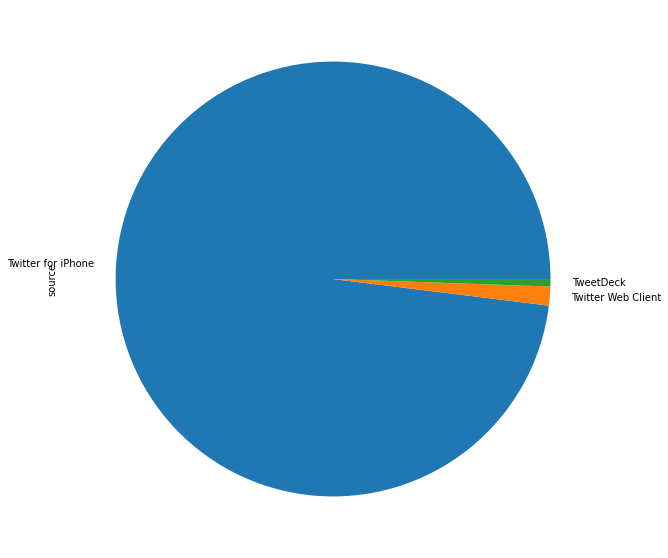

In [60]:
twitter_master.source.value_counts().plot(kind='pie', figsize = [10,10]);

An overwhelming majority of the tweets are from *Twitter for iPhone*


Which Dog Breeds are the most predicted?

There are three columns indicating predictions, we can check the variations in the predictions made by visualizing each predicted column for the Breeds most predicted.

In [61]:
#create function for plotting Breed predictions

def plot1(df, col):
    '''
    The function returns a Histogram with values in the column passed
            Parameters:
                    df = Dataframe with relevant column
                    col (str) = column in Dataframe to be plotted
            Returns:
                    Chart : Plotted based on input parameters
        '''
    #data preparation    
    data = df[col].sort_index().value_counts().head(20)
    
    #plotting graph
    data.plot(kind = 'barh', figsize = (10,10))
    plt.title(f'Which Dog Breeds Are Most Predicted?',fontsize = 15)
    plt.xlabel("Dog Breeds",fontsize = 15)
    plt.ylabel("Count", fontsize = 15);

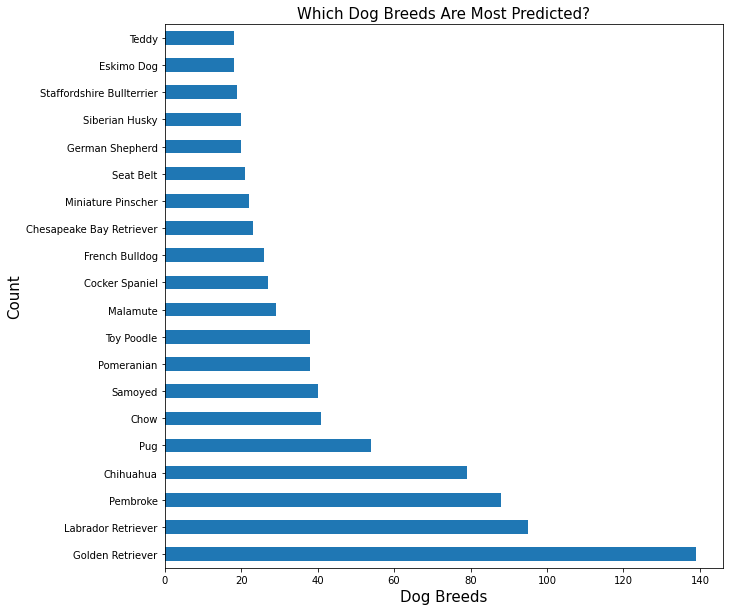

In [62]:
#check top breeds in first prediction

plot1(twitter_master, col = 'prediction1')

The *Golden Retriever* is the top predicted breed while the *Labrador Retriever* and *Pembroke* take the second and third spots

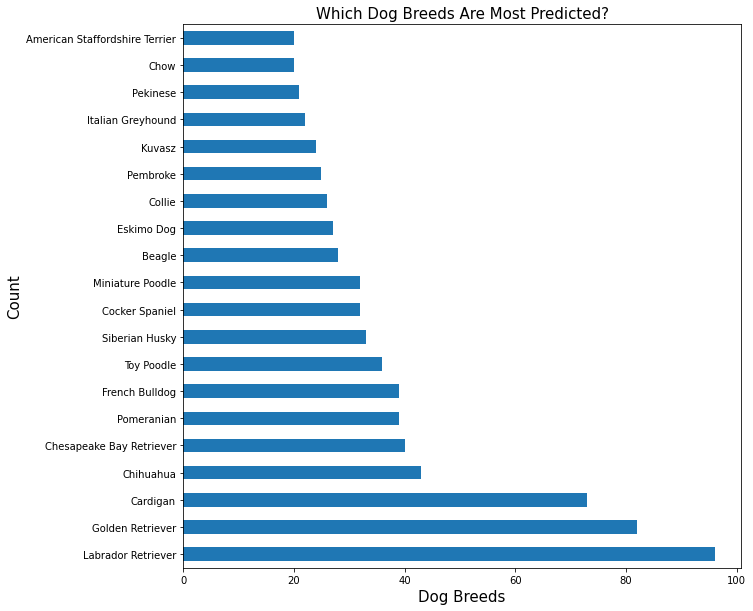

In [63]:
#check top breeds in second prediction

plot1(twitter_master, col = 'prediction2')

In the second prediction column, The *Labrador Retriever* takes the spot from the *Golden Retriever* and the *Pembroke* does not show up in the top 10. The top 10 here is somewhat divergent from *prediction1*, asides the top 2, only 3 other breeds are common to both; the *Chihuahua* which retains its spot at number 4 in both charts, the *Pomeranian* and the *Toy Poodle* that have different positions here

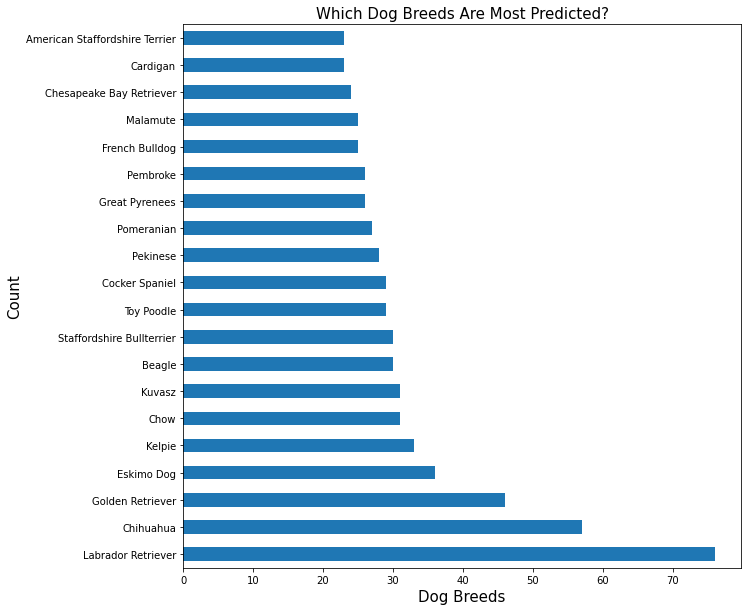

In [64]:
#check top breeds in third prediction

plot1(twitter_master, col = 'prediction3')

*prediction3* has more similarities with *prediction2* than *prediction1*. The top breed is the same as *prediction2* but the *Golden Retriever* is third here and the *Chihuahua* edges up to the second spot. The *Chow* shows up in *prediction1* at the same spot, 6th. The *Cocker Spaniel* is 10th here and in *prediction2*.

Which Prediction column has the highest confidence score?

Since there are confidence values for each prediction, we can check which prediction column has higher confidence value on average

In [65]:
#check average confidence range for prediction1

twitter_master.prediction_confidence1.mean()

59.39422768304915

In [66]:
#check average confidence range for prediction2

twitter_master.prediction_confidence2.mean()

13.44196088264792

In [67]:
#check average confidence range for prediction3

twitter_master.prediction_confidence3.mean()

6.024749247743225

The *prediction1* column scores less than 60% on average, but it has a much higher mean value compared to the other two columns. This makes it the best prediction to refer to in determining the appropriate column for defining the predicted breeds.

What year were most Tweets made?

In [69]:
#create year column
twitter_master['Year'] = twitter_master['timestamp'].dt.year

In [113]:
#create function for plotting graph

def plot2(df, col):
    '''
    The function returns a Histogram with values in the column passed
            Parameters:
                    df = Dataframe with relevant column
                    col (str) = column in Dataframe to be plotted
            Returns:
                    Chart : Plotted based on input parameters
        '''
    #data preparation    
    twt_plt = df[col].value_counts().sort_values()
    
    #plotting graph
    twt_plt.plot(kind='bar', figsize = (10,10))
    plt.title(f'Which Year Had The Most Tweets?',fontsize = 15)
    plt.xlabel("Years",fontsize = 15)
    plt.ylabel("Number of Tweets", fontsize = 15);

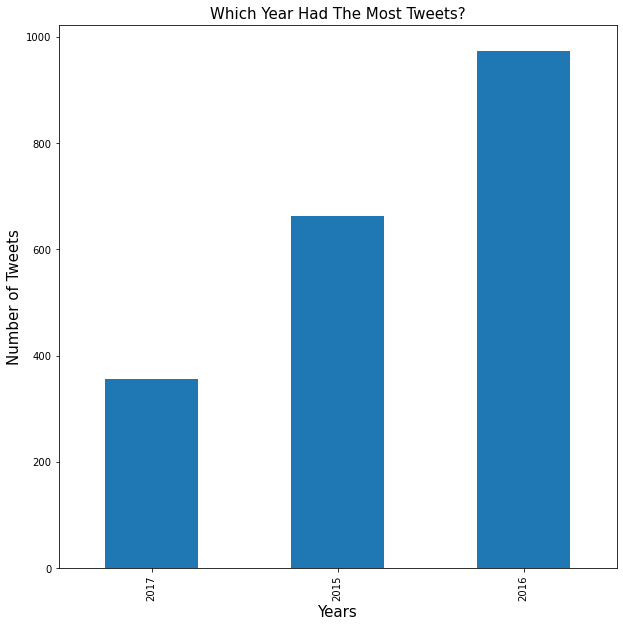

In [114]:
#call function
plot2(twitter_master, col='Year')

Most of the tweets in the data were made in 2016 and all the data is from only three years; 2015, 2016 and 2017.

What month were most tweets made?

In [82]:
#create month column
twitter_master['Month'] = twitter_master['timestamp'].dt.month_name()

In [ ]:
#check table to view outcome
twitter_master.head(10)

In [119]:
#create function for plotting graph

def plot3(df, col):
    '''
    The function returns a Histogram with values in the column passed
            Parameters:
                    df = Dataframe with relevant column
                    col (str) = column in Dataframe to be plotted
            Returns:
                    Chart : Plotted based on input parameters
        '''
    #data preparation    
    twt_plt = df[col].value_counts().sort_values()
    
    #plotting graph
    twt_plt.plot(kind='barh', figsize = (10,10))
    plt.title(f'Which Month Had The Most Tweets?',fontsize = 15)
    plt.xlabel("Number of Tweets",fontsize = 15)
    plt.ylabel("Months", fontsize = 15);

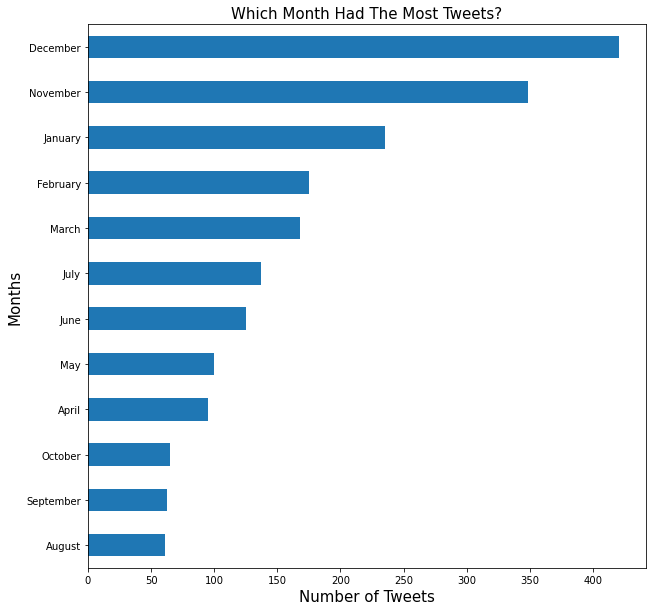

In [120]:
#calling function
plot3(twitter_master, col='Month')

The last months of the year, November and December take the top spot with the most tweets, followed closely by the first three months of the year following each other.

<a id='References'></a>

### References

https://www.codegrepper.com/code-examples/python/how+to+view+the+dataframe+in+python+without+collapse

https://www.statology.org/valueerror-trailing-data/

https://realpython.com/pandas-merge-join-and-concat/

https://datascientyst.com/convert-month-number-to-month-name-pandas-dataframe/